In [ ]:
URK21CS1004                                                          04/10/2023

In [ ]:
AIM: To demonstrate Performance Analysis on Decision Tree classification techniques.

In [ ]:
DESCRIPTION:
    Decision Tree Classification Technique is a fundamental supervised learning method used for solving classification problems. It can also be applied to regression tasks but is primarily preferred for classification scenarios. Decision Trees create a tree-like structure where each internal node represents dataset features, branches represent decision rules, and each leaf node represents an outcome. The CART (Classification and Regression Tree) algorithm is commonly used for Decision Tree construction.

Entropy:
    Entropy is a critical concept in Decision Trees. It quantifies the homogeneity or impurity of a dataset. In classification, the ID3 algorithm utilizes entropy to determine the purity of subsets generated during tree construction.
    The entropy formula is given as: Entropy(s) = -P(yes) * log2(P(yes)) - P(no) * log2(P(no)) , S is the total number of samples., P(yes) is the probability of a "yes" outcome, P(no) is the probability of a "no" outcome.
    Entropy is 0 when a dataset is completely homogeneous (all samples have the same class), and it is 1 when a dataset is equally divided among different classes.

    Information Gain:
    Information Gain is a metric used to assess the decrease in entropy after a dataset is split based on a particular attribute. It is essential in determining which attribute is chosen for splitting during tree construction. The goal is to find the attribute that yields the highest information gain, resulting in the most homogeneous branches.

    Gini Index:
        The Gini Index is another measure of impurity used in Decision Tree construction, especially in the CART algorithm. It quantifies the likelihood of a randomly chosen element being misclassified.
        The Gini Index formula is: Gini Index = 1 - ∑(Pj^2) , Pj represents the probability of an element being classified into class j.
        A Gini Index of 0 indicates perfect purity (all elements belong to the same class), while a Gini Index of 1 implies maximum impurity (elements are evenly distributed among different classes).

In [ ]:
PROGRAMS:

In [ ]:
1. Develop a Decision Tree classification model for the Social_Network dataset using the scikit-learn

In [4]:
print("BISWAYAN MEHRA \nURK21CS1004")
import pandas as pd
df = pd.read_csv('Social_Network.csv')
df.head(2)

BISWAYAN MEHRA 
URK21CS1004


,User ID,Gender,Age,EstimatedSalary,Purchased
0,15668575,0,26,43000,No
1,15603246,0,27,57000,No


In [ ]:
a. Use the columns: 'Gender', 'Age', 'EstimatedSalary' as the independent variables

In [5]:
print("BISWAYAN MEHRA \nURK21CS1004")
X = df[['Gender', 'Age', 'EstimatedSalary']]

BISWAYAN MEHRA 
URK21CS1004


In [ ]:
b. Use the target variable as 'Purchased' (Yes-Y, No-N)

In [6]:
print("BISWAYAN MEHRA \nURK21CS1004")
y = df['Purchased']

BISWAYAN MEHRA 
URK21CS1004


In [ ]:
c. Encode the categorical value of the target column to numerical value

In [7]:
print("BISWAYAN MEHRA \nURK21CS1004")
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

BISWAYAN MEHRA 
URK21CS1004


In [ ]:
d. Divide the data into training (75%) and testing set (25%)

In [8]:
print("BISWAYAN MEHRA \nURK21CS1004")
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

BISWAYAN MEHRA 
URK21CS1004


In [ ]:
e. Perform the classification with entropy and information gain

In [9]:
print("BISWAYAN MEHRA \nURK21CS1004")
from sklearn.tree import DecisionTreeClassifier
entropy_classifier = DecisionTreeClassifier(criterion='entropy')
entropy_classifier.fit(X_train, y_train)
y_pred_entropy = entropy_classifier.predict(X_test)

BISWAYAN MEHRA 
URK21CS1004


In [ ]:
f. Analyse the performance of the classifier with various performance measures suchasconfusion matrix, accuracy, recall, precision, specificity, f-score, Receiver operatingcharacteristic (ROC) curve and Area Under Curve (AUC) score.

In [10]:
print("BISWAYAN MEHRA \nURK21CS1004")
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc
cm = confusion_matrix(y_test, y_pred_entropy)
print("Confusion Matrix:\n", cm)
accuracy = accuracy_score(y_test, y_pred_entropy)
print("Accuracy:", accuracy)
precision = precision_score(y_test, y_pred_entropy)
print("Precision:", precision)
recall = recall_score(y_test, y_pred_entropy)
print("Recall:", recall)
f1 = f1_score(y_test, y_pred_entropy)
print("F1-Score:", f1)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_entropy)
roc_auc = auc(fpr, tpr)
print("AUC Score:", roc_auc)

BISWAYAN MEHRA 
URK21CS1004
Confusion Matrix:
 [[59  8]
 [ 4 29]]
Accuracy: 0.88
Precision: 0.7837837837837838
Recall: 0.8787878787878788
F1-Score: 0.8285714285714285
AUC Score: 0.879692446856626


In [ ]:
g. Display the constructed decision tree.

BISWAYAN MEHRA 
URK21CS1004


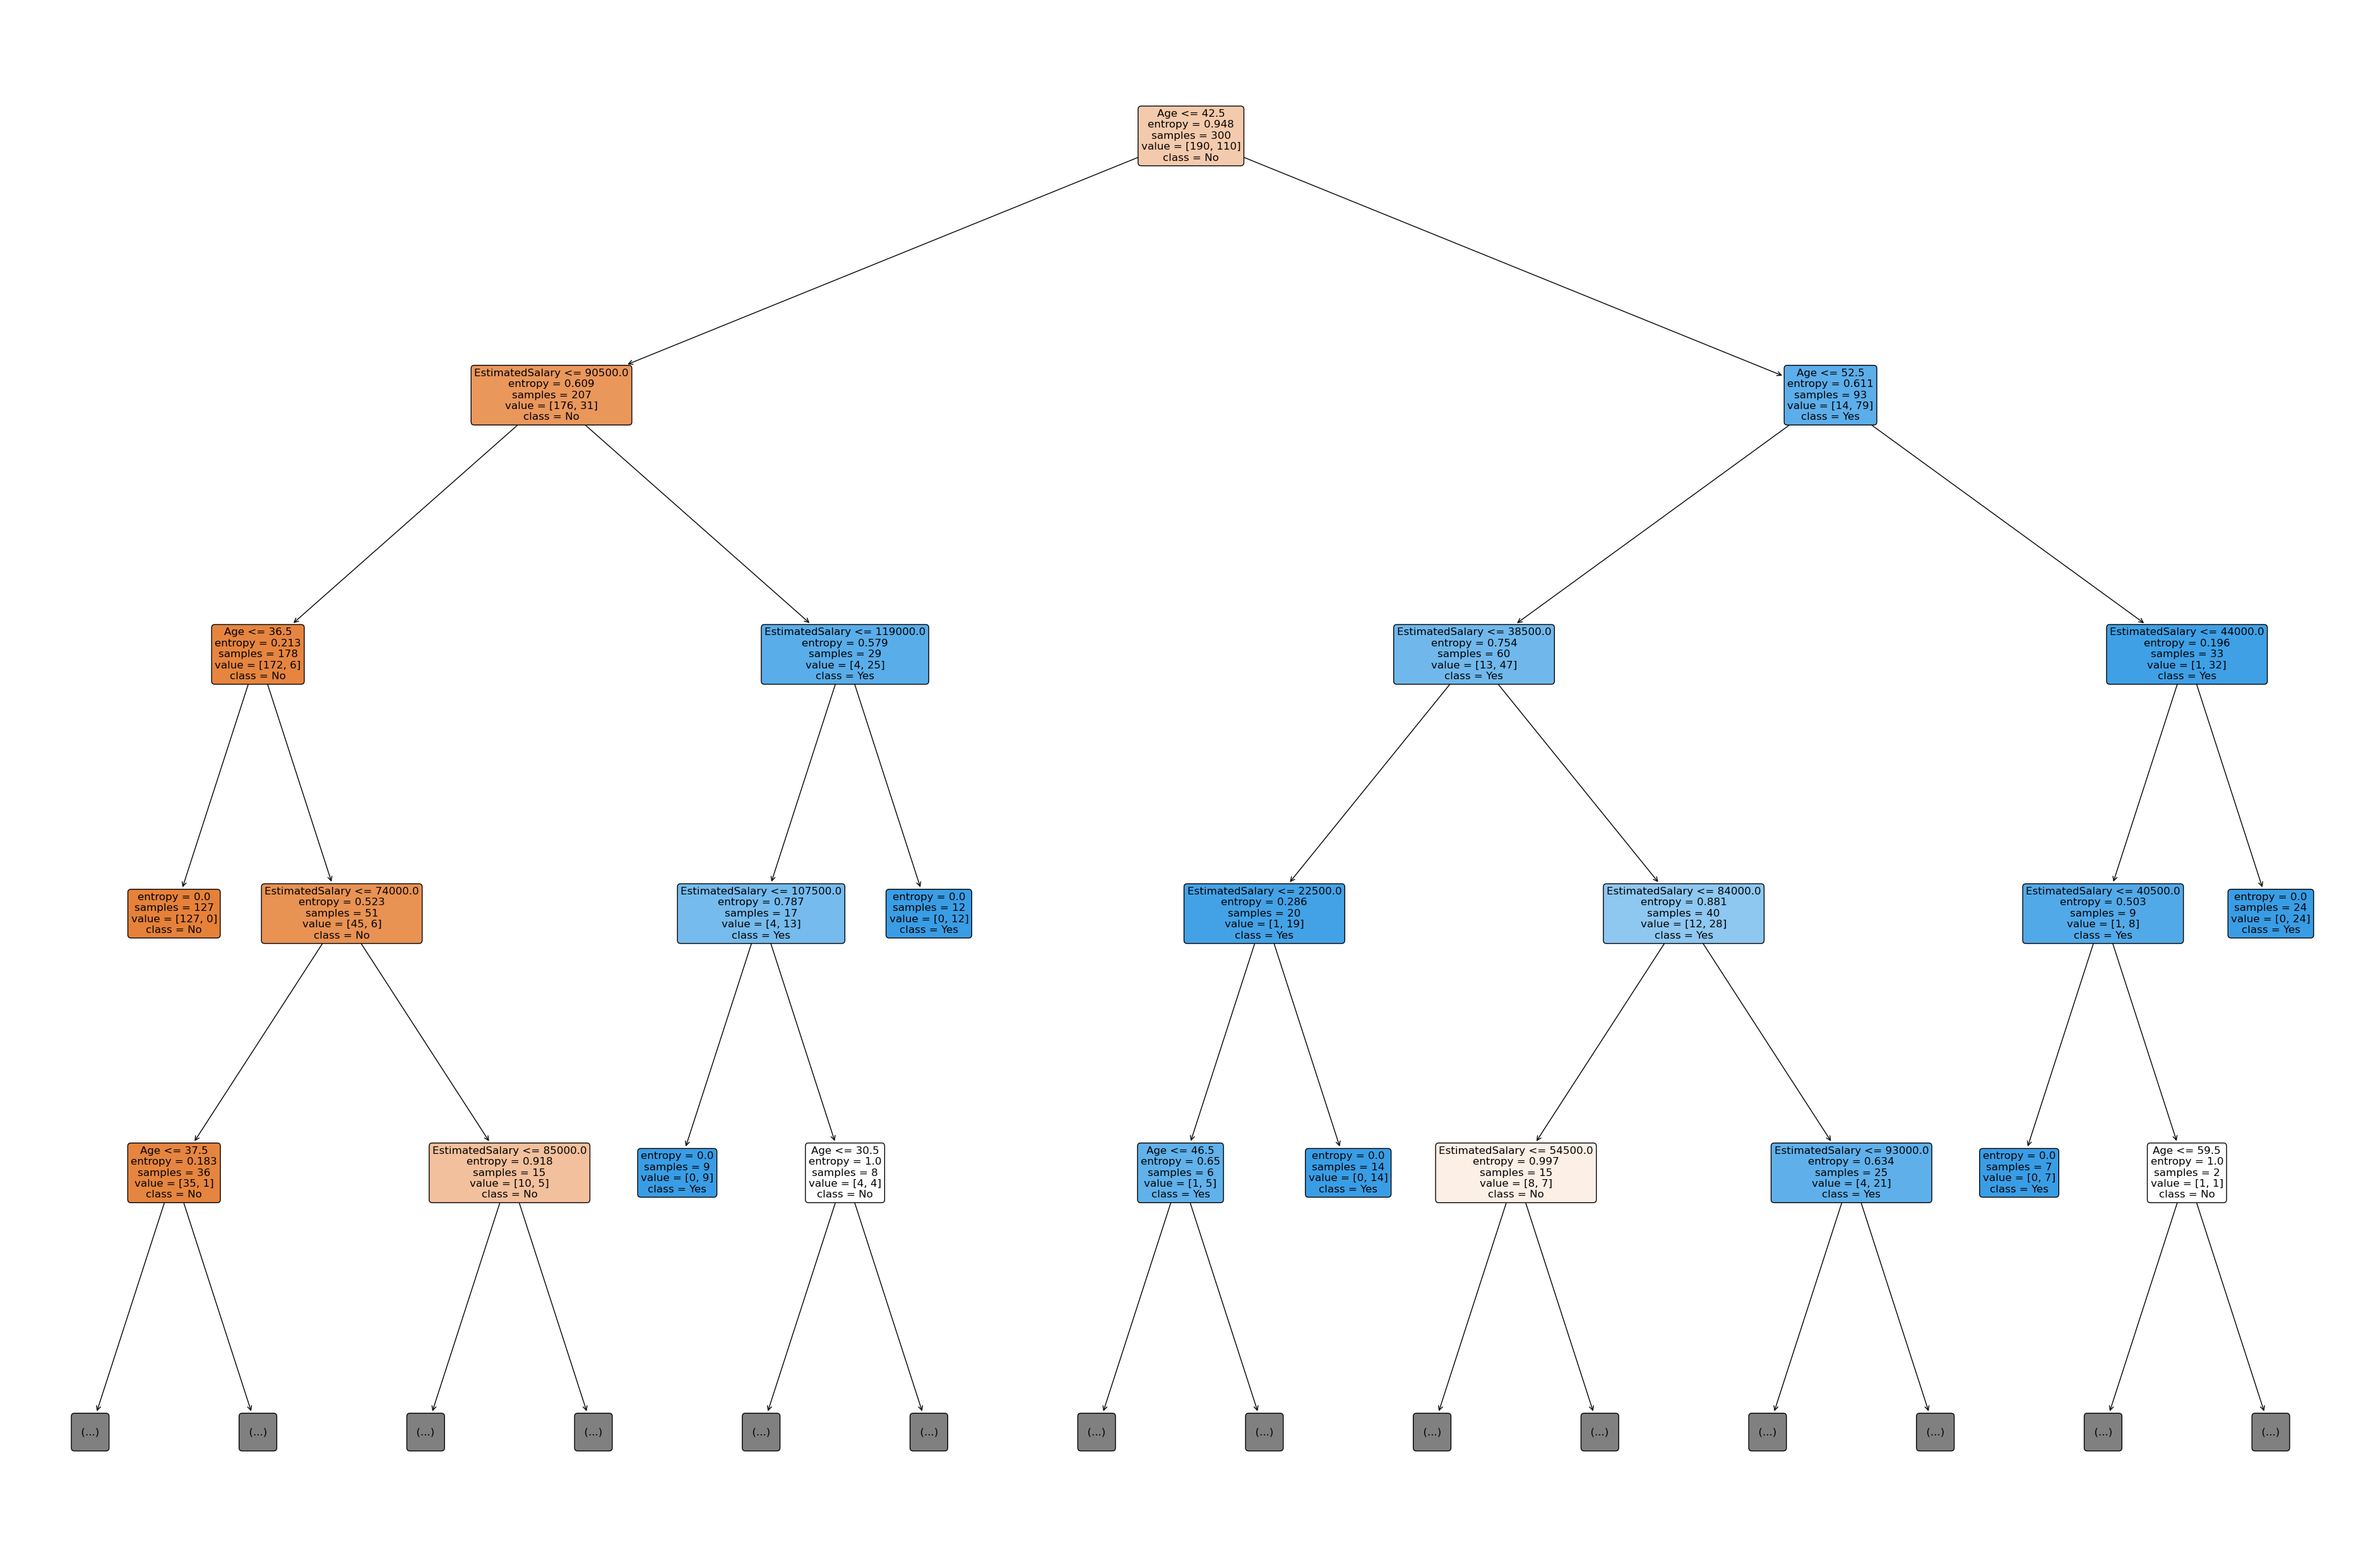

In [27]:
print("BISWAYAN MEHRA \nURK21CS1004")
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
plt.figure(figsize=(48, 32))
plot_tree(entropy_classifier, feature_names=list(X.columns), class_names=['No', 'Yes'], filled=True, rounded=True, max_depth=4)
plt.show()

In [ ]:
h. Prune the tree with maximum depth as 3,5,7 and tabulate the various TP, TN, accuracy, f-score and AUC score obtained.

In [12]:
print("BISWAYAN MEHRA \nURK21CS1004")
max_depths = [3, 5, 7]
results = []
for max_depth in max_depths:
    classifier = DecisionTreeClassifier(criterion='entropy', max_depth=max_depth)
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)
    results.append([max_depth, cm[0, 0], cm[1, 1], accuracy, f1, roc_auc])
result_df = pd.DataFrame(results, columns=['Max Depth', 'True Negatives', 'True Positives', 'Accuracy', 'F1-Score', 'AUC Score'])
print(result_df)

BISWAYAN MEHRA 
URK21CS1004
   Max Depth  True Negatives  True Positives  Accuracy  F1-Score  AUC Score
0          3              60              30      0.90  0.857143   0.902307
1          5              61              31      0.92  0.885714   0.924921
2          7              60              30      0.90  0.857143   0.902307


In [ ]:
RESULT:
    Thus, the programs to demonstrate Performance Analysis on Decision Tree classification technique using scikit-learn was executed and verified successfully.